In [1]:
import numpy as np 
import pandas as pd


In [2]:
df = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')


In [3]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

## Convert the date column to date time object for easier plotting

In [4]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])


In [5]:
availableCountries = df['Country'].unique().tolist()

In [6]:
rollingAve = 7

r1 = []
r2 = []
r3 = []
r4 = []

for c in availableCountries:
    usedf = df.loc[df['Country']==c]
    r1 += usedf['New_cases'].rolling(rollingAve).mean().to_list()
    r2 += usedf['New_deaths'].rolling(rollingAve).mean().tolist()
    r3 += usedf['Cumulative_cases'].rolling(rollingAve).mean().tolist()
    r4 += usedf['Cumulative_deaths'].rolling(rollingAve).mean().tolist()
df['New_cases_rolling'] = np.nan_to_num(r1)
df['New_deaths_rolling'] = np.nan_to_num(r2)
df['Cumulative_cases_rolling'] = np.nan_to_num(r3)
df['Cumulative_deaths_rolling'] = np.nan_to_num(r4)


    

In [8]:
%matplotlib widget
import ipympl

import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import mplcursors
from IPython.display import display, clear_output

In [11]:
columns = ['New_cases_rolling', 'New_deaths_rolling', 'cumulative_cases_rolling', 'cumulative_deaths_rolling']
options = ['Daily Cases', 'Daily Deaths', 'Cumulative Cases', 'Cumulative Deaths']

country = 'United States of America'

column = 'New_cases_rolling'

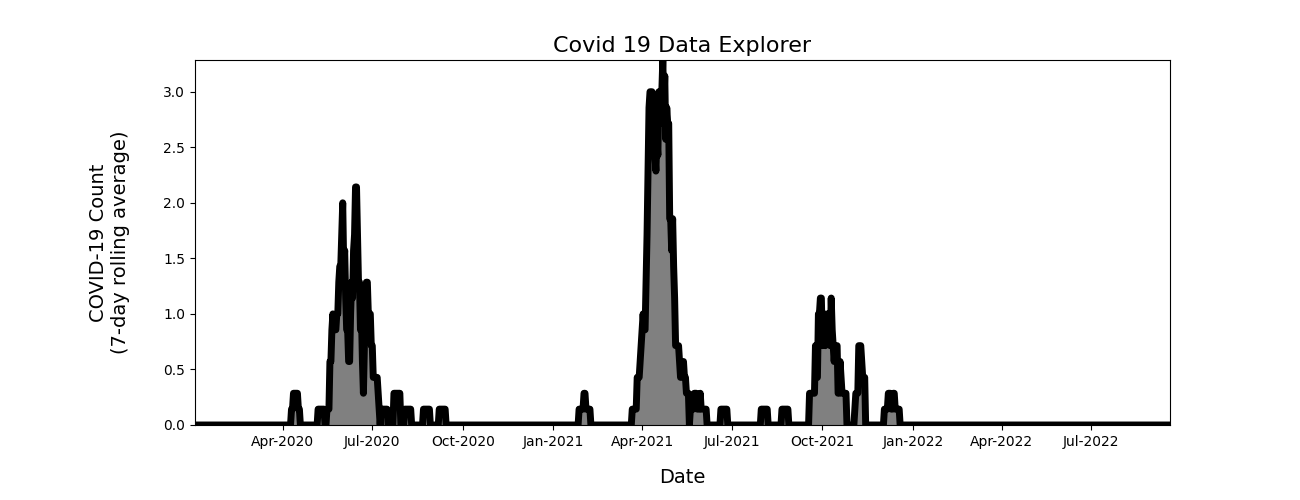

In [17]:





usedf = df.loc[df['Country']==country].reset_index(drop=True)

fig, ax = plt.subplots(figsize=(13,5))
line, = ax.plot(usedf['Date_reported'], usedf[column], color='black', linewidth=5)
filled=ax.fill_between(usedf['Date_reported'], usedf[column], color = 'gray')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
ax.set_xlim(min(usedf['Date_reported']),max(usedf['Date_reported']))
ax.set_xlabel('Date', fontsize = 14, labelpad = 14) 

ax.set_ylim(0, max(usedf[column]))
ax.set_ylabel('COVID-19 Count\n(7-day rolling average)', fontsize = 14, labelpad = 24)

ax.set_title('Covid 19 Data Explorer', fontsize = 16)

fig.subplots_adjust(bottom = 0.15, left = 0.15)

mplcursors.cursor(hover=True)


plt.show()


def updatePlot(country, column):
    usedf = df.loc[df['Country'] == country].reset_index(drop=True)
    
    line.set_xdata(usedf['Date_reported'])
    line.set_ydata(usedf[column])
    
    
    xData = mdates.date2num(usedf['Date_reported'])
    yData = usedf[column].values
    verts = [[x,y] for (x,y) in zip (xData, yData)]
    
    verts.append([xData[-1], 0])
    verts.append([xData[0], 0])
    filled.set_verts([verts])
    
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    ax.set_ylim(0, np.nanmax(usedf[column]))
    
def changeCountry(change):
    global country
    country = change.new
    updatePlot(country, column)
def changeColumn(change):
    global column
    index = options.index(change.new)
    if(index >=0):
        column = columns[index]
        updatePlot(country, column)
    else:
        print('bad radio button input', change.new, index)
        
dropdown = widgets.Dropdown(
value= country,
options= availableCountries,
description = '')

dropdown.observe(changeCountry, names = 'value')

radiobuttons = widgets.RadioButtons(
value = 'Daily Cases',
options = options, 
description = ''
)

radiobuttons.observe(changeColumn, names = 'value')

widgets.VBox(
[
    dropdown, 
    radiobuttons,
])
    
